In [185]:
import pandas as pd

In [186]:
# take list of csv files in ../CSVs/ and read them into a dictionary of dataframes
csv_files = !ls ../CSVs/

In [187]:
df = pd.DataFrame()

# Load file
for file in csv_files:
    df = pd.concat([df, pd.read_csv(f'../CSVs/{file}')])

In [188]:
df

,Idx,Specie,File,Validation,Suggested Specie
0,1,CommonDolphin,channelA_2024-06-07_16-28-17_48kHz_199_206_0.3...,-1,NaN
1,2,CommonDolphin,channelA_2024-06-08_01-05-49_48kHz_49_56_0.47.WAV,1,NaN
2,3,CommonDolphin,channelA_2024-06-08_10-02-04_48kHz_202_209_0.4...,-1,NaN
3,4,CommonDolphin,channelA_2024-06-08_11-12-36_48kHz_178_185_0.3...,-1,NaN
4,5,CommonDolphin,channelA_2024-06-08_11-17-36_48kHz_229_236_0.4...,0,Human_diver
...,...,...,...,...,...
1,2,StripedDolphin,channelA_2024-06-07_18-00-41_48kHz_13_20_0.4.WAV,-1,NaN
2,3,StripedDolphin,channelA_2024-06-08_11-17-36_48kHz_181_188_0.3...,-1,NaN
3,4,StripedDolphin,channelA_2024-06-08_11-39-27_48kHz_55_62_0.33.WAV,-1,NaN
4,5,StripedDolphin,channelA_2024-06-08_19-01-27_48kHz_52_59_0.32.WAV,2,Bird


In [189]:
# df = df[df['Validation'] != -100]
# df = df[df['Validation'] != -1]
# df = df[df['Validation'] != -2]

In [190]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
df['Validation'] = df['Validation'].map({1: 'Correct', 0: 'Other specie', -2: 'Unknown', 2: 'Cetacean', -1: 'Incorrect'})

<Figure size 1200x800 with 0 Axes>

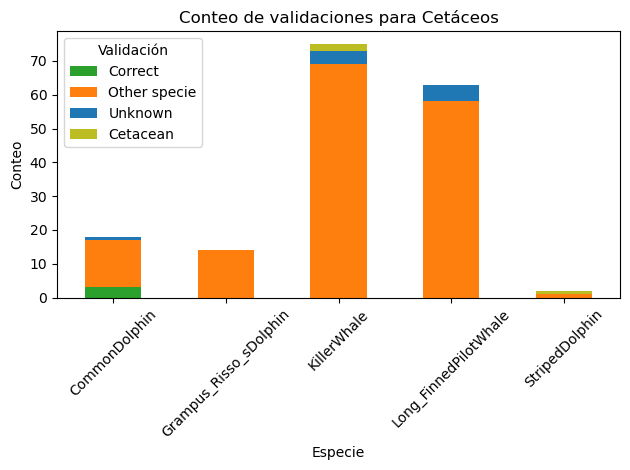

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame


# Green for Correct, Orange for Bird, Red for Other specie, Blue for Unknown
colors = {'Correct': 'C2', 'Cetacean': 'C8', 'Other specie': 'C1', 'Unknown': 'C0', "Incorrect:": "C3"}

# Group by 'Specie' and 'Validation' and count occurrences
grouped = df.groupby(['Specie', 'Validation']).size().unstack(fill_value=0)

# Ensure the columns are in the correct order
grouped = grouped[['Correct', 'Other specie', 'Unknown', 'Cetacean']]

# Plotting
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, color=[colors[val] for val in grouped.columns])
plt.title('Conteo de validaciones para Cetáceos')
plt.xlabel('Especie')
plt.ylabel('Conteo')
plt.legend(title='Validación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [166]:
df["Suggested Specie"].unique()

array([nan, 'Human_diver', 'Motor boat', 'Ferry_Fast ferry', 'WHAT?',
       'Bird', 'KillerWhale', 'Diver+wee'], dtype=object)

In [167]:
# # Drop rows where Validation is Unknown and Bird in df
# print(len(df))

# df = df[df.Validation != 'Unknown']
# df = df[df.Validation != 'Bird']

# print(len(df))

In [168]:
# Reset the index to ensure unique labels
df = df.reset_index(drop=True)

df["SegmentFile"] = df["File"]
df["StartSecond"] = df["File"].str.split("_").str.get(-3)
df["EndSecond"] = df["File"].str.split("_").str.get(-2)
df["ConfidenceScore"] = df["File"].str.replace(".WAV","").str.split("_").str.get(-1)
# File = File split but last 4 elements separated by _
df["File"] = df["File"].str.split('_').str[:-4].str.join('_') + ".WAV"
df

,Idx,Specie,File,Validation,Suggested Specie,SegmentFile,StartSecond,EndSecond,ConfidenceScore
0,2,CommonDolphin,channelA_2024-06-08_01-05-49.WAV,1,NaN,channelA_2024-06-08_01-05-49_48kHz_49_56_0.47.WAV,49,56,0.47
1,5,CommonDolphin,channelA_2024-06-08_11-17-36.WAV,0,Human_diver,channelA_2024-06-08_11-17-36_48kHz_229_236_0.4...,229,236,0.4
2,6,CommonDolphin,channelA_2024-06-08_11-17-36.WAV,0,Human_diver,channelA_2024-06-08_11-17-36_48kHz_247_254_0.3...,247,254,0.38
3,7,CommonDolphin,channelA_2024-06-08_15-34-48.WAV,0,Human_diver,channelA_2024-06-08_15-34-48_48kHz_154_161_0.6...,154,161,0.61
4,8,CommonDolphin,channelA_2024-06-08_15-34-48.WAV,0,Human_diver,channelA_2024-06-08_15-34-48_48kHz_157_164_0.3...,157,164,0.31
...,...,...,...,...,...,...,...,...,...
157,74,Long_FinnedPilotWhale,channelA_2024-06-09_15-27-30.WAV,0,Human_diver,channelA_2024-06-09_15-27-30_48kHz_253_260_0.2...,253,260,0.29
158,75,Long_FinnedPilotWhale,channelA_2024-06-09_15-27-30.WAV,0,Human_diver,channelA_2024-06-09_15-27-30_48kHz_277_284_0.4...,277,284,0.48
159,76,Long_FinnedPilotWhale,channelA_2024-06-09_15-27-30.WAV,0,Human_diver,channelA_2024-06-09_15-27-30_48kHz_286_293_0.2...,286,293,0.29
160,1,StripedDolphin,channelA_2024-06-07_13-04-47.WAV,0,Motor boat,channelA_2024-06-07_13-04-47_48kHz_139_146_0.4...,139,146,0.44


In [169]:
# Create column StartRecordingTimestamp from File (channelA_YYYY-MM-DD_HH-MM-SS.WAV)
df["StartRecordingTimestamp"] = df["File"].str.split('_').str.get(1) + " " + df["File"].str.split('_').str.get(2).str.replace(".WAV","")
df["StartRecordingTimestamp"] = pd.to_datetime(df["StartRecordingTimestamp"], format="%Y-%m-%d %H-%M-%S")

# Convert StartSecond and EndSecond to numeric values
df["StartSecond"] = pd.to_numeric(df["StartSecond"])
df["EndSecond"] = pd.to_numeric(df["EndSecond"])

# StartAnnotationTimestamp = StartRecordingTimestamp + StartSecond
df["StartAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["StartSecond"], unit='s')
# EndAnnotationTimestamp = StartRecordingTimestamp + EndSecond
df["EndAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["EndSecond"], unit='s')

# Order of columns: File, SegmentFile, StartSecond, EndSecond, StartRecordingTimestamp, StartAnnotationTimestamp, EndAnnotationTimestamp, Specie, Validation, Suggested Specie, ConfidenceScore
df = df[['File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Specie', 'Validation', 'Suggested Specie', 'ConfidenceScore']]
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-08_01-05-49.WAV,channelA_2024-06-08_01-05-49_48kHz_49_56_0.47.WAV,49,56,2024-06-08 01:05:49,2024-06-08 01:06:38,2024-06-08 01:06:45,CommonDolphin,1,NaN,0.47
1,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_229_236_0.4...,229,236,2024-06-08 11:17:36,2024-06-08 11:21:25,2024-06-08 11:21:32,CommonDolphin,0,Human_diver,0.4
2,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_247_254_0.3...,247,254,2024-06-08 11:17:36,2024-06-08 11:21:43,2024-06-08 11:21:50,CommonDolphin,0,Human_diver,0.38
3,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_154_161_0.6...,154,161,2024-06-08 15:34:48,2024-06-08 15:37:22,2024-06-08 15:37:29,CommonDolphin,0,Human_diver,0.61
4,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_157_164_0.3...,157,164,2024-06-08 15:34:48,2024-06-08 15:37:25,2024-06-08 15:37:32,CommonDolphin,0,Human_diver,0.31
...,...,...,...,...,...,...,...,...,...,...,...
157,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_253_260_0.2...,253,260,2024-06-09 15:27:30,2024-06-09 15:31:43,2024-06-09 15:31:50,Long_FinnedPilotWhale,0,Human_diver,0.29
158,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_277_284_0.4...,277,284,2024-06-09 15:27:30,2024-06-09 15:32:07,2024-06-09 15:32:14,Long_FinnedPilotWhale,0,Human_diver,0.48
159,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_286_293_0.2...,286,293,2024-06-09 15:27:30,2024-06-09 15:32:16,2024-06-09 15:32:23,Long_FinnedPilotWhale,0,Human_diver,0.29
160,channelA_2024-06-07_13-04-47.WAV,channelA_2024-06-07_13-04-47_48kHz_139_146_0.4...,139,146,2024-06-07 13:04:47,2024-06-07 13:07:06,2024-06-07 13:07:13,StripedDolphin,0,Motor boat,0.44


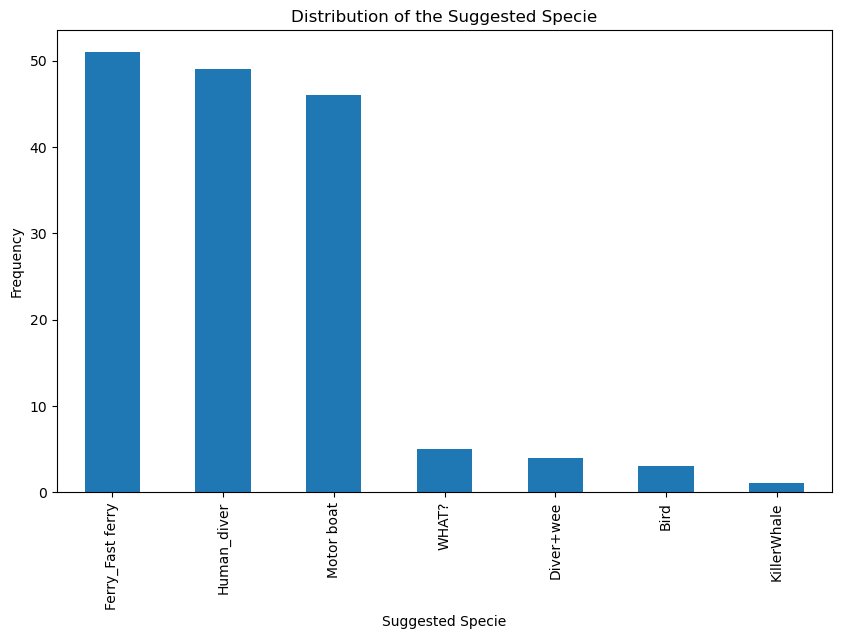

In [170]:
import matplotlib.pyplot as plt
# Distribution of the Altertative
plt.figure(figsize=(10, 6))
df['Suggested Specie'].value_counts().plot(kind='bar')
plt.xlabel('Suggested Specie')
plt.ylabel('Frequency')
plt.title('Distribution of the Suggested Specie')
plt.show()

In [171]:
# If validation is correct, set the suggested specie is the same as the specie
df.loc[df['Validation'] == 1, 'Suggested Specie'] = df['Specie']

In [172]:
# if Validation is -2, set Suggested Specie to Cetacean
df.loc[df['Validation'] == 2, 'Suggested Specie'] = 'Cetacean'

In [173]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-08_01-05-49.WAV,channelA_2024-06-08_01-05-49_48kHz_49_56_0.47.WAV,49,56,2024-06-08 01:05:49,2024-06-08 01:06:38,2024-06-08 01:06:45,CommonDolphin,1,CommonDolphin,0.47
1,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_229_236_0.4...,229,236,2024-06-08 11:17:36,2024-06-08 11:21:25,2024-06-08 11:21:32,CommonDolphin,0,Human_diver,0.4
2,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_247_254_0.3...,247,254,2024-06-08 11:17:36,2024-06-08 11:21:43,2024-06-08 11:21:50,CommonDolphin,0,Human_diver,0.38
3,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_154_161_0.6...,154,161,2024-06-08 15:34:48,2024-06-08 15:37:22,2024-06-08 15:37:29,CommonDolphin,0,Human_diver,0.61
4,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_157_164_0.3...,157,164,2024-06-08 15:34:48,2024-06-08 15:37:25,2024-06-08 15:37:32,CommonDolphin,0,Human_diver,0.31
...,...,...,...,...,...,...,...,...,...,...,...
157,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_253_260_0.2...,253,260,2024-06-09 15:27:30,2024-06-09 15:31:43,2024-06-09 15:31:50,Long_FinnedPilotWhale,0,Human_diver,0.29
158,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_277_284_0.4...,277,284,2024-06-09 15:27:30,2024-06-09 15:32:07,2024-06-09 15:32:14,Long_FinnedPilotWhale,0,Human_diver,0.48
159,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_286_293_0.2...,286,293,2024-06-09 15:27:30,2024-06-09 15:32:16,2024-06-09 15:32:23,Long_FinnedPilotWhale,0,Human_diver,0.29
160,channelA_2024-06-07_13-04-47.WAV,channelA_2024-06-07_13-04-47_48kHz_139_146_0.4...,139,146,2024-06-07 13:04:47,2024-06-07 13:07:06,2024-06-07 13:07:13,StripedDolphin,0,Motor boat,0.44


In [174]:
df["Suggested Specie"].unique()

array(['CommonDolphin', 'Human_diver', 'Motor boat', 'Ferry_Fast ferry',
       'WHAT?', 'Cetacean', 'KillerWhale', 'Diver+wee'], dtype=object)

In [175]:
# delete rows with Suggestions = WHAT?
df = df[df['Suggested Specie'] != 'WHAT?']

In [ ]:
# whistle, human_diver_1_breath, human_diver_2_wee, Ferry_FastFerry, Motor_boat
# # If CommonDolphin, KillerWhale or Cetacean, set Suggested Specie to Whistle
# df.loc[df['Suggested Specie'].isin(['CommonDolphin', 'KillerWhale', 'Cetacean']), 'Suggested Specie'] = 'Whistle'
# # If Human_diver set to Human_diver_1_breath
# df.loc[df['Suggested Specie'].isin(['Human_diver']), 'Suggested Specie'] = 'Human_diver_1_breath'
# # If Diver+wee set to Human_diver_2_wee
# df.loc[df['Suggested Specie'].isin(['Diver+wee']), 'Suggested Specie'] = 'Human_diver_2_wee'
# # If Motor boat set to Motor_boat
# df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
# # If Ferry set to Ferry_FastFerry
# df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-08_01-05-49.WAV,channelA_2024-06-08_01-05-49_48kHz_49_56_0.47.WAV,49,56,2024-06-08 01:05:49,2024-06-08 01:06:38,2024-06-08 01:06:45,CommonDolphin,1,Whistle,0.47
1,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_229_236_0.4...,229,236,2024-06-08 11:17:36,2024-06-08 11:21:25,2024-06-08 11:21:32,CommonDolphin,0,Human_diver_1_breath,0.40
2,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_247_254_0.3...,247,254,2024-06-08 11:17:36,2024-06-08 11:21:43,2024-06-08 11:21:50,CommonDolphin,0,Human_diver_1_breath,0.38
3,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_154_161_0.6...,154,161,2024-06-08 15:34:48,2024-06-08 15:37:22,2024-06-08 15:37:29,CommonDolphin,0,Human_diver_1_breath,0.61
4,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_157_164_0.3...,157,164,2024-06-08 15:34:48,2024-06-08 15:37:25,2024-06-08 15:37:32,CommonDolphin,0,Human_diver_1_breath,0.31
...,...,...,...,...,...,...,...,...,...,...,...
157,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_253_260_0.2...,253,260,2024-06-09 15:27:30,2024-06-09 15:31:43,2024-06-09 15:31:50,Long_FinnedPilotWhale,0,Human_diver_1_breath,0.29
158,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_277_284_0.4...,277,284,2024-06-09 15:27:30,2024-06-09 15:32:07,2024-06-09 15:32:14,Long_FinnedPilotWhale,0,Human_diver_1_breath,0.48
159,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_286_293_0.2...,286,293,2024-06-09 15:27:30,2024-06-09 15:32:16,2024-06-09 15:32:23,Long_FinnedPilotWhale,0,Human_diver_1_breath,0.29
160,channelA_2024-06-07_13-04-47.WAV,channelA_2024-06-07_13-04-47_48kHz_139_146_0.4...,139,146,2024-06-07 13:04:47,2024-06-07 13:07:06,2024-06-07 13:07:13,StripedDolphin,0,Motor_boat,0.44


In [ ]:
# delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# # save csv as wopam_day_annotations.csv
# df.to_csv('wopam_day_annotations.csv', index=False)

In [157]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Annotation
0,channelA_2024-06-08_01-05-49.WAV,channelA_2024-06-08_01-05-49_48kHz_49_56_0.47.WAV,49,56,2024-06-08 01:05:49,2024-06-08 01:06:38,2024-06-08 01:06:45,Whistle
1,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_229_236_0.4...,229,236,2024-06-08 11:17:36,2024-06-08 11:21:25,2024-06-08 11:21:32,Human_diver_1_breath
2,channelA_2024-06-08_11-17-36.WAV,channelA_2024-06-08_11-17-36_48kHz_247_254_0.3...,247,254,2024-06-08 11:17:36,2024-06-08 11:21:43,2024-06-08 11:21:50,Human_diver_1_breath
3,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_154_161_0.6...,154,161,2024-06-08 15:34:48,2024-06-08 15:37:22,2024-06-08 15:37:29,Human_diver_1_breath
4,channelA_2024-06-08_15-34-48.WAV,channelA_2024-06-08_15-34-48_48kHz_157_164_0.3...,157,164,2024-06-08 15:34:48,2024-06-08 15:37:25,2024-06-08 15:37:32,Human_diver_1_breath
...,...,...,...,...,...,...,...,...
157,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_253_260_0.2...,253,260,2024-06-09 15:27:30,2024-06-09 15:31:43,2024-06-09 15:31:50,Human_diver_1_breath
158,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_277_284_0.4...,277,284,2024-06-09 15:27:30,2024-06-09 15:32:07,2024-06-09 15:32:14,Human_diver_1_breath
159,channelA_2024-06-09_15-27-30.WAV,channelA_2024-06-09_15-27-30_48kHz_286_293_0.2...,286,293,2024-06-09 15:27:30,2024-06-09 15:32:16,2024-06-09 15:32:23,Human_diver_1_breath
160,channelA_2024-06-07_13-04-47.WAV,channelA_2024-06-07_13-04-47_48kHz_139_146_0.4...,139,146,2024-06-07 13:04:47,2024-06-07 13:07:06,2024-06-07 13:07:13,Motor_boat


/tmp/ipykernel_592273/3304693427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


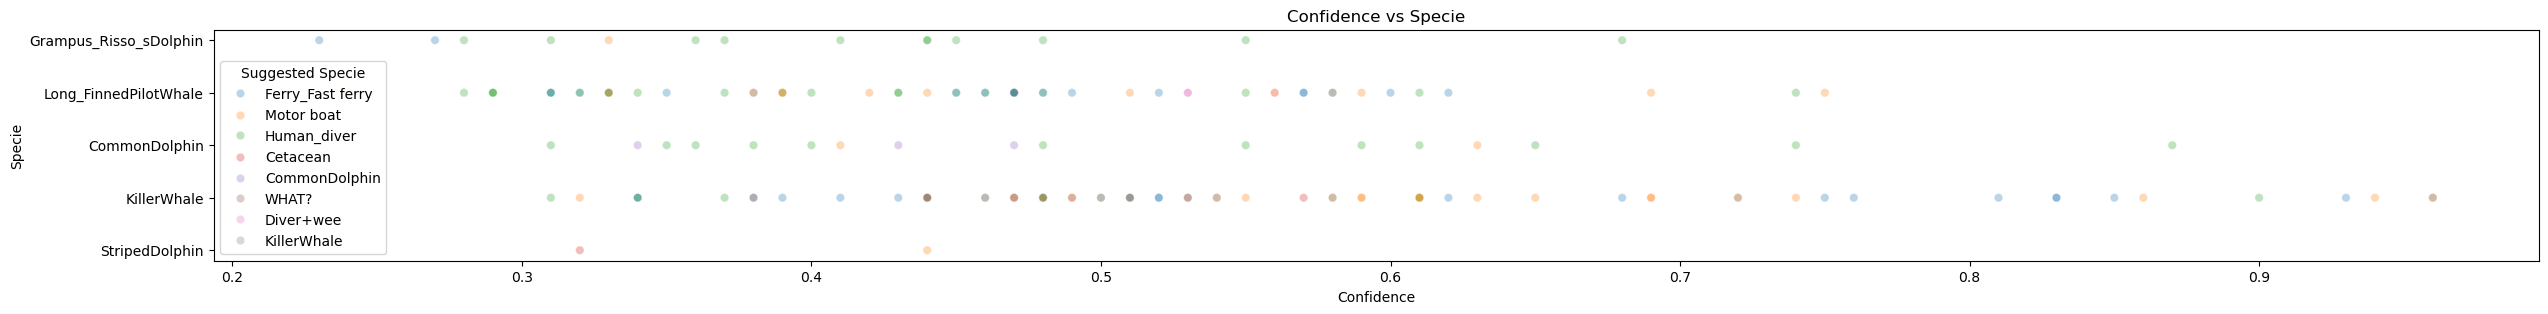

In [136]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Suggested Specie", alpha=0.3)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

/tmp/ipykernel_592273/4255151684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


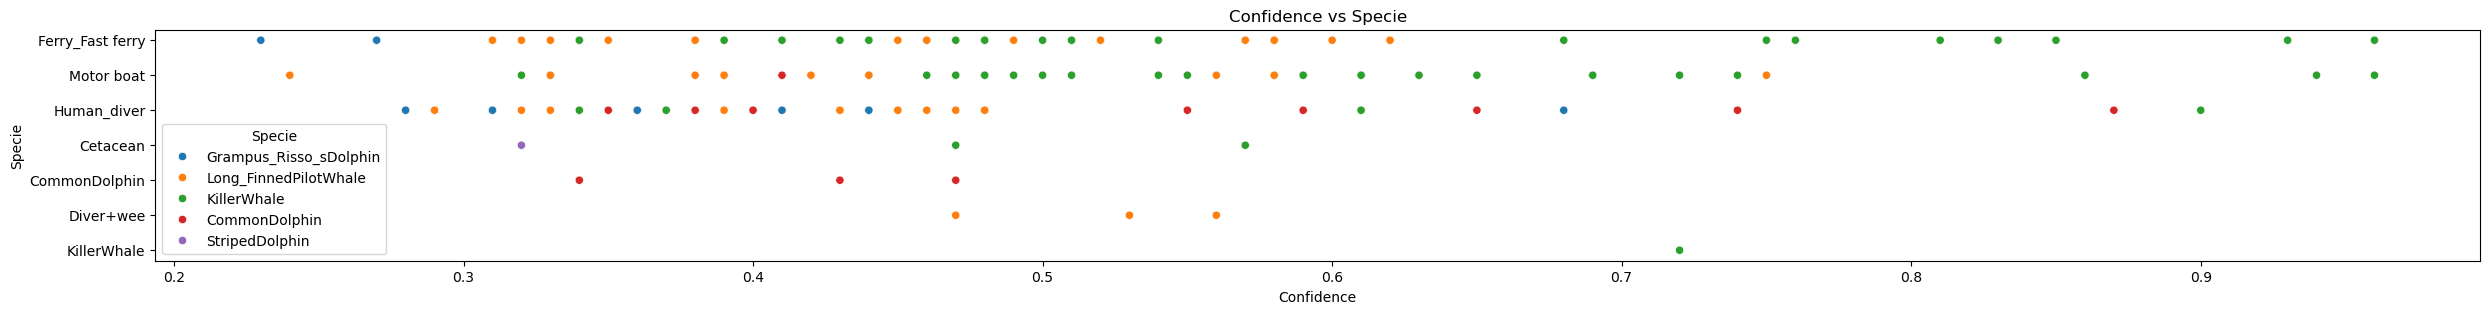

In [177]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Specie", alpha=1)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

/tmp/ipykernel_592273/494332848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


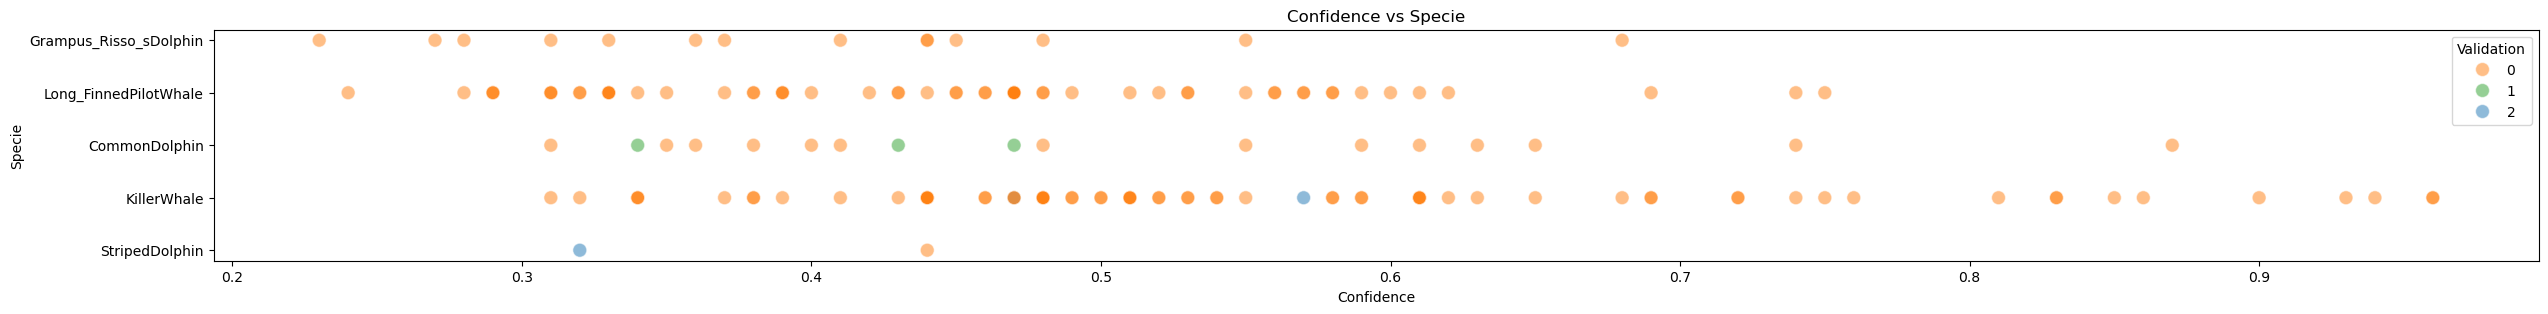

In [148]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()